task 2.13.5
Загрузите данные train.csv, найдите признак, обозначающий баланс. 
Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. 
Найдите разницу между максимальным и минимальным среди значений, которые остались после удаления выбросов.

In [4]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, asin, sqrt
%matplotlib inline

vis_data = pd.read_csv("./2.13_train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)

In [5]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [9]:
import seaborn as sns

/home/dex/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


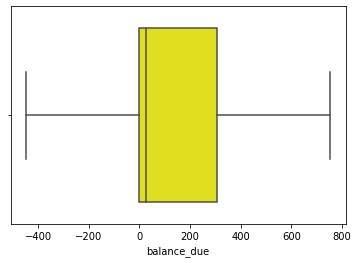

In [14]:
sns.boxplot(vis_data.balance_due, color='yellow');

In [15]:
#Метод межквартильного расстояния
def outliers_iqr(ys): 
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [40]:
#Найдите выбросы с помощью межквартильного расстояния
o = outliers_iqr(vis_data.balance_due.dropna()) #и избавимся от пропусков
o

array([], dtype=int64)

Метод поиска выбросов из лекций возвращает индексы выбросов. o - индексы выбросов. Выбросы нужно удалить --> нужно удалить значения по этим индексам.

In [41]:
vis_data.balance_due.dropna()
for i in range (0, len(o)):
    vis_data.balance_due.pop(o[i])

In [ ]:
# def remove_abnormalities(values, indices):
#     return [val for i, val in enumerate(values) if i not in indices]

In [46]:
vis_data.balance_due

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 240473, dtype: float64

In [49]:
vdbd_max = np.max(vis_data.balance_due)
vdbd_min = np.min(vis_data.balance_due)

In [54]:
abs(vdbd_max-vdbd_min) #correct

1201.3

/home/dex/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


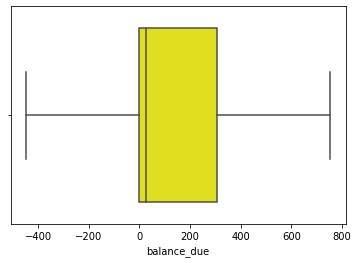

In [55]:
sns.boxplot(vis_data.balance_due, color='yellow');